In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [3]:
# load Fashion-MNIST dataset
x, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

In [4]:
#  (a) Verify the shape of the data
# (b)  x = 70000 pictures of 28x28 each, so 784 features
# (c) y = count of 70000 labels with a string from 0-9 for each class (0 = tshirt/ 1= trouser...)
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
#  (b) use slicing and indexing to inspect a few samples from the dataset
# you can see how every pixel has a number up from 0 to 255, the range of grayscale values
# print(x[0]) 
print(y[8:15])

['5' '5' '0' '9' '5' '5' '7']


In [6]:
#print(y[0:10])

# # 1. method: boolean masking

# unique_values = np.unique(y)

# for label in unique_values:
#     mask = (y == label)
#     count = np.sum(mask)
#     print(label,count)


# the right method
labels, counts = np.unique(y, return_counts=True)

for label, count in zip(labels, counts):
    print(f"  Class '{label}': {count} images")


  Class '0': 7000 images
  Class '1': 7000 images
  Class '2': 7000 images
  Class '3': 7000 images
  Class '4': 7000 images
  Class '5': 7000 images
  Class '6': 7000 images
  Class '7': 7000 images
  Class '8': 7000 images
  Class '9': 7000 images


In [7]:
# (e) normalize the data to 0-1.0. dude numpy is crazy
x_normalized = x / 255.0
print(x_normalized[5:6:])

[[0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.08627451 0.34509804 0.7372549
  0.6745098  0.51764706 0.49019608 0.55294118 0.78039216 0.56078431
  0.03529412 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.07843137 0.51372549
  0.78039216 0.80784314 0.76862745 0.79215686 0.94901961 1.
  1.         0.98039216 0.87058824 0.77254902 0.80784314 0.7372549
  0.49411765 0.06666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00392157
  0.         0.1372549  0.83921569 0.74901961 0.71764706 0.69803922
  0.68627451 0.65882353 0.58823529 0.63529412 0.62352941 0.59607843
  0.61960784 0.70196078 0.71764706 0.74117647 0.76470588 0.7254902
  0.32156863 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.66666667
  0.74509804 0.6745098  0.69411

In [8]:
# (af) reshape one of the samples back to 28x28 and print it out
# image2d = x_normalized[0].reshape(28, 28)

# turn all into 2d images
image3d = x_normalized.reshape(-1, 28, 28)

In [9]:
# splitting the dataset into garments and others (35.000 garments and 35.000 others)
mask_garments = (y == '0') | (y == '2') | (y == '3') | (y == '4') | (y == '6')
mask_others = ~mask_garments

x_garments = image3d[mask_garments]
y_garments = y[mask_garments]

x_others = image3d[mask_others]
y_others = y[mask_others]

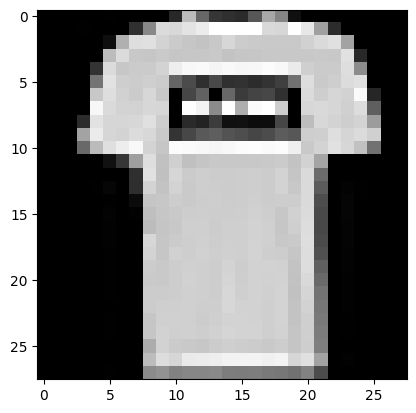

In [10]:
# mpl that shit
image = x_garments[0]
label = y_garments[0]

plt.imshow(image, cmap='gray')
plt.show()

# BEHOLD 
# A TSHIRT

In [12]:
# save the variables as np_file

y_garments_int = y_garments.astype(int)
y_others_int = y_others.astype(int)


np.savez_compressed(
    "fashion_mnist_garments.npz",
    x_garments=x_garments,
    y_garments=y_garments_int,
    x_others=x_others,
    y_others=y_others_int)